In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [2]:
veriler = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
veriler

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [13]:
#Bu kısımda rastgele göstererek ödül ve ceza puanı ile rastgelelikle yakaladığımız değer.
N = 10000
d = 10
toplam = 0
secilenler =[]
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = veriler.values[n,ad]
    toplam = toplam + odul

In [14]:
ad

2

In [15]:
odul

0

In [16]:
toplam

1295

(array([1049.,  984., 1084.,  956.,  989.,  994.,  998., 1001.,  981.,
         964.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

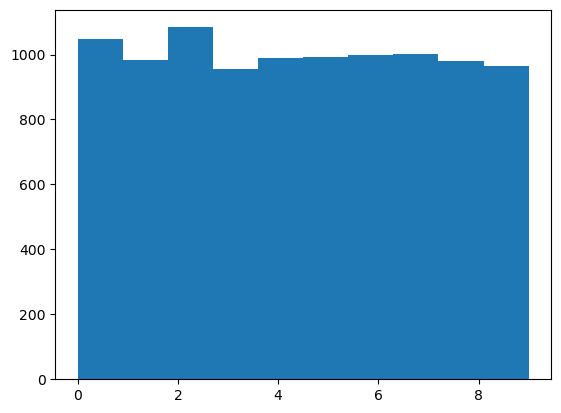

In [17]:
plt.hist(secilenler)

## UCB

In [22]:
N = 10000
d = 10
oduller = [0] * d # Tüm reklamların ödül değeri 0
toplam = 0 #Toplam ödül.
tiklamalar = [0] * d # O ana kadarki tıklamalar.
secilenler = []
for n in range(1,N):
    ad = 0 #Seçilen ilan
    max_ucb = 0
    for i in range(0,d):
        if tiklamalar[i]> 0:
            ortalama = oduller[i]/tiklamalar[i]
            delta = math.sqrt(3/2 * math.log(n) / tiklamalar[i])
            ucb = ortalama + delta
        else:
            ucb = N * 10
        if max_ucb < ucb:
            max_ucb = ucb #Max tan büyük bir UCB bulundu.
            ad = i
    secilenler.append(ad)
    tiklamalar[ad] = tiklamalar[ad] + 1
    odul = veriler.values[n,ad]
    oduller[ad] = oduller[ad] + odul
    toplam = toplam + odul
toplam

2231

(array([ 529.,  372.,  253.,  394., 6187.,  144.,  283., 1320.,  321.,
         196.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

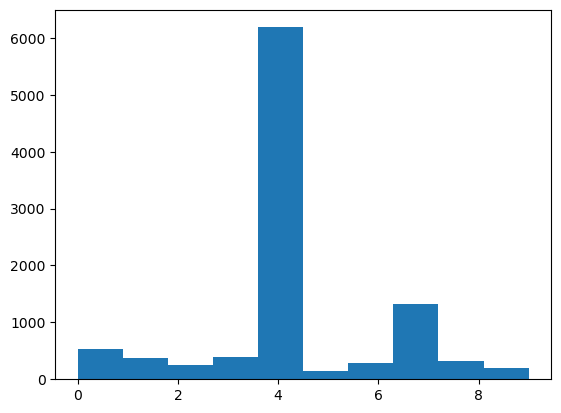

In [23]:
plt.hist(secilenler)

## Thompson

In [24]:
N = 10000
d = 10
birler = [0] * d
sifirlar = [0] * d
oduller = [0] * d # Tüm reklamların ödül değeri 0
toplam = 0 #Toplam ödül.
secilenler = []
for n in range(1,N):
    ad = 0 #Seçilen ilan
    max_th = 0
    for i in range(0,d):
        rasbeta = random.betavariate(birler[i] + 1 , sifirlar[i] + 1 )
        if rasbeta > max_th:
            max_th = rasbeta
            ad = i
    secilenler.append(ad)
    odul = veriler.values[n,ad]
    
    if odul == 1:
        birler[ad] = birler[ad] + 1
    else:
        sifirlar[ad] = sifirlar[ad] + 1
    
    oduller[ad] = oduller[ad] + odul
    toplam = toplam + odul
toplam

2620

(array([  85.,   94.,   40.,   41., 9351.,   24.,   76.,  234.,   30.,
          24.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

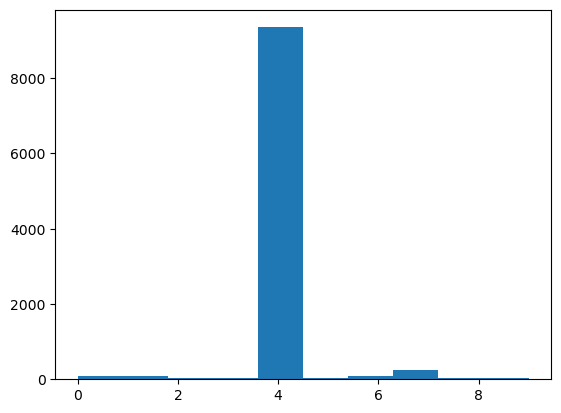

In [25]:
plt.hist(secilenler)